In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import math
import random
from tqdm import tqdm_notebook
import matplotlib
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from sklearn.feature_selection import RFECV

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 30)

from datetime import datetime
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
path='../input/ashrae-energy-prediction/'
path_new = '../input/lag-transform/'
path_new = '../input/transformer/'
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn.model_selection import StratifiedKFold,TimeSeriesSplit, train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from math import sin,log,pow
import lightgbm as lgb
import datetime
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder, MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import multiprocessing as mp
import multiprocessing as mp
from multiprocessing import Pool
from tqdm import tqdm
from functools import partial
pd.options.mode.chained_assignment = None
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import holidays
import shap

import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
def ls():
     print([v for v in globals().keys() if not v.startswith('_')])

def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    
def chunk_shapper(X,model,n=200,verbose=True,dim=1000000):
    pos = np.sort(np.random.randint(X.shape[0], size=dim))
    X = X.iloc[pos, :]
    predict_fold = KFold(n)
    result = np.zeros(X.shape)
    if verbose:
        for trn_idx, val_idx in tqdm_notebook(predict_fold.split(X)):
               result[val_idx,:] = model.shap_values(X.iloc[val_idx,:])
    else:
        for trn_idx, val_idx in predict_fold.split(X):
            result[val_idx,:] = model.predict(X.iloc[val_idx,:])
    return(result,pos)

def free_space(del_list):
    for name in del_list:
        if not name.startswith('_'):
            del globals()[name]
    gc.collect()



../input/ashrae-energy-prediction/test.csv
../input/ashrae-energy-prediction/building_metadata.csv
../input/ashrae-energy-prediction/train.csv
../input/ashrae-energy-prediction/weather_test.csv
../input/ashrae-energy-prediction/sample_submission.csv
../input/ashrae-energy-prediction/weather_train.csv


In [2]:
path_load = '../input/train-transformer/'
train = pd.read_hdf(f'{path_load}dataset.h5',key='train')
column = pd.read_hdf(f'{path_load}dataset.h5',key='column')['column'].tolist()
category_column = pd.read_hdf(f'{path_load}dataset.h5',key='category_column')['cat_column'].tolist()
target = pd.read_hdf(f'{path_load}dataset.h5',key='target')
gc.collect()

22

In [3]:
SEED = 42
seed_everything(SEED)
gc.collect()

0

In [4]:
seed = 1
params = {
                    'objective': 'regression',
                    'boosting_type':'gbdt',
                    'metric':'rmse',
                    'learning_rate':.3,
                    'colsample_bytree': 0.7699242354175626,
                    'lambda_l1': 1.7233942541747633,
                    'lambda_l2': 1.835065251306714,
                    'max_depth': int(69.45971425060898),
                    'min_data_in_leaf': int(30.792304068114845),
                    'min_gain_to_split': 0.3262201710999464,
                    'min_sum_hessian_in_leaf': 0.007097047333357153,
                    'num_leaves': int(510.37557713422353),
                    'subsample': 0.7385647527529277,
                    'tree_learner':'serial',
                    'max_bin':255,
                    'seed': seed,
                    'n_jobs':-1,
                    'importance_type':'gain',
                    'early_stopping_rounds':10, 
}


In [5]:
%%time
strat =train['building_id'].astype(str) + train['meter'].astype(str)
le = LabelEncoder()
strat = le.fit_transform(strat).astype(np.int16)
free_space(['le'])

gc.collect()

CPU times: user 1min 16s, sys: 5.8 s, total: 1min 22s
Wall time: 1min 22s


0

In [6]:
n_fold = 2

folds = StratifiedKFold(n_splits=n_fold, shuffle=False,random_state=0)
# train_x, valid_x, train_y, valid_y= train_test_split(train,target,test_size =.4,shuffle=False)
val_idx, trn_idx  = next(folds.split(train,strat))
train_x, train_y = train.iloc[trn_idx,:], target.iloc[trn_idx]
valid_x, valid_y = train.iloc[val_idx,:], target.iloc[val_idx]
gc.collect()

0

In [7]:
%%time
gc.collect()
num_boost=0

score = 0

sampled = []
gc.collect()
print('Begin model\n')
model = lgb.train(params,lgb.Dataset(train_x, label=train_y,categorical_feature=category_column),
                  2000, valid_sets = lgb.Dataset(valid_x, label=valid_y,categorical_feature=category_column),verbose_eval=10) #
gc.collect()
shap_m = shap.TreeExplainer(model)
print('Beginning Shap\n')
shap_values, pos = chunk_shapper(valid_x,shap_m)

free_space(['model','train_x','train_y','valid_x','valid_y'])
gc.collect()



Begin model

Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 1.12273
[20]	valid_0's rmse: 1.12255
Early stopping, best iteration is:
[13]	valid_0's rmse: 1.11776
Beginning Shap




CPU times: user 1h 6min 49s, sys: 16.8 s, total: 1h 7min 6s
Wall time: 17min 27s


0

In [8]:
# pos = np.where(shap_values.sum(axis=1)!=shap_values.shape[1])[0]
# shap_values2 = shap_values[pos,:]
val = abs(shap_values).mean(axis=0)
# feat_imp = pd.DataFrame(label = train.columns,importance = val/sum(val))
feat_imp = pd.DataFrame(sorted(zip(val/sum(val), train.columns), reverse=True),
                       columns=['importance', 'Feature']).set_index('Feature')

feat_imp.to_csv('feature_importance.csv', index=False)
selected = feat_imp[feat_imp['importance']>0]
feat_imp.to_csv('feature_selection.csv', index=False)
print('Starting number of features:',train.shape[1])
print('Optimal number of features:', selected.shape[0])

Starting number of features: 27
Optimal number of features: 27


In [9]:
feat_imp

,importance
Feature,
building_meter,0.252811
building_id,0.223891
square_feet,0.221574
hour,0.053056
meter,0.037278
m2k,0.034436
meter_count,0.026241
pm2k,0.023477
weekend,0.022754


In [10]:
selected

,importance
Feature,
building_meter,0.252811
building_id,0.223891
square_feet,0.221574
hour,0.053056
meter,0.037278
m2k,0.034436
meter_count,0.026241
pm2k,0.023477
weekend,0.022754


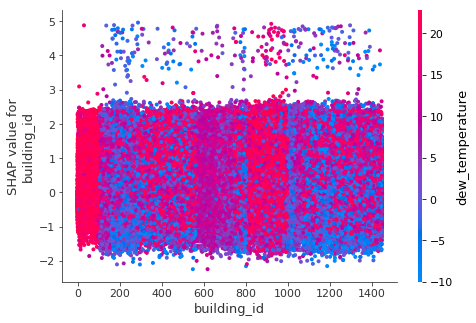

In [11]:
shap.initjs()
shap.dependence_plot("building_id", shap_values, train.iloc[pos,:])


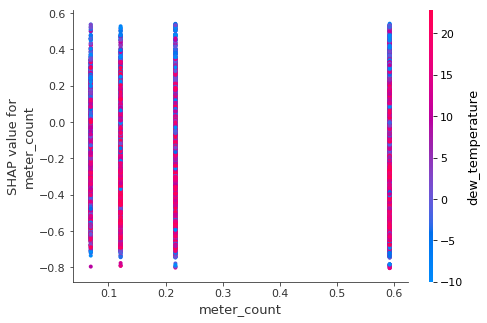

In [12]:
shap.dependence_plot("meter_count", shap_values, train.iloc[pos,:])


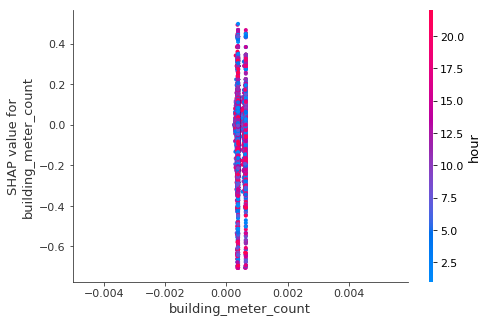

In [13]:
shap.dependence_plot("building_meter_count", shap_values, train.iloc[pos,:])


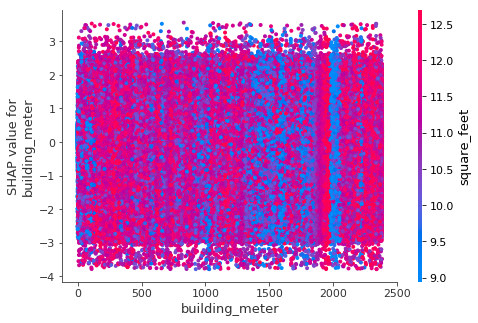

In [14]:
shap.dependence_plot("building_meter", shap_values, train.iloc[pos,:])


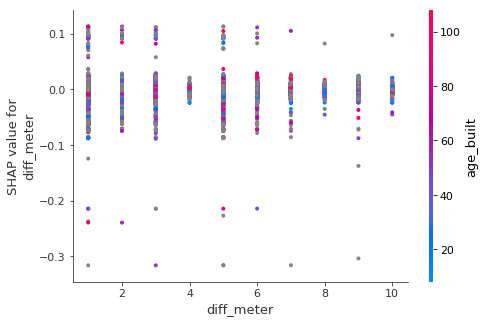

In [15]:
shap.dependence_plot("diff_meter", shap_values, train.iloc[pos,:])


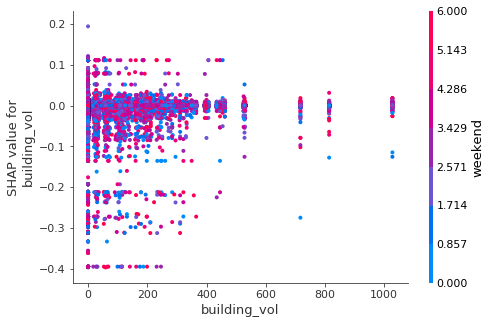

In [16]:
shap.dependence_plot("building_vol", shap_values, train.iloc[pos,:])


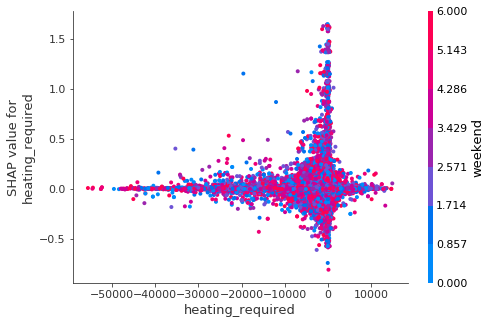

In [17]:
shap.dependence_plot("heating_required", shap_values, train.iloc[pos,:])


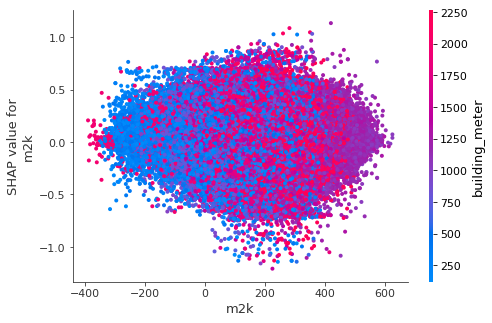

In [18]:
shap.dependence_plot("m2k", shap_values, train.iloc[pos,:])


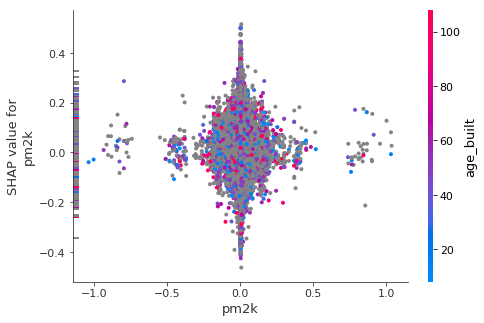

In [19]:
shap.dependence_plot("pm2k", shap_values, train.iloc[pos,:])


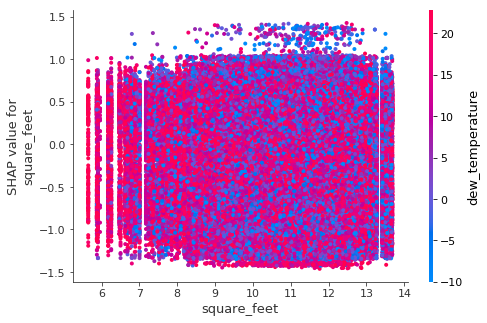

In [20]:
shap.dependence_plot("square_feet", shap_values, train.iloc[pos,:])


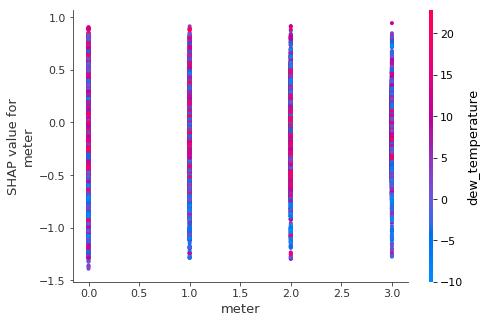

In [21]:
shap.dependence_plot("meter", shap_values, train.iloc[pos,:])


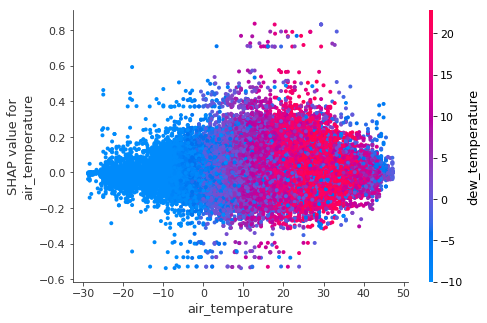

In [22]:
shap.dependence_plot("air_temperature", shap_values, train.iloc[pos,:])


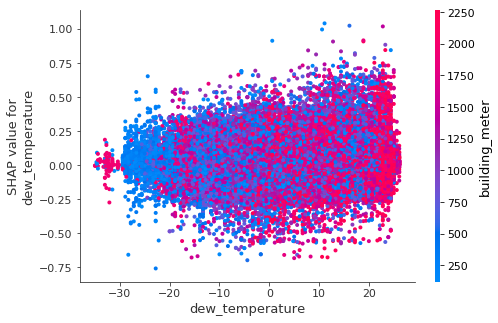

In [23]:
shap.dependence_plot("dew_temperature", shap_values, train.iloc[pos,:])


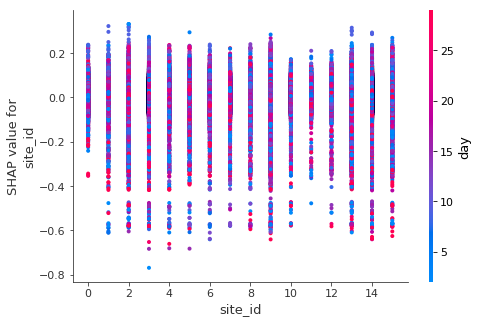

In [24]:
shap.dependence_plot("site_id", shap_values, train.iloc[pos,:])


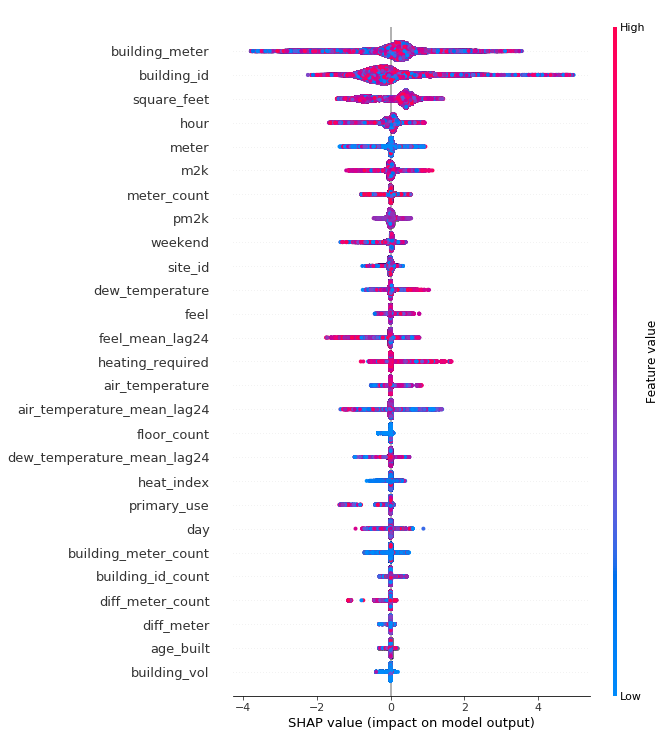

In [25]:
shap.summary_plot(shap_values, train.iloc[pos,:], max_display = train.shape[1])


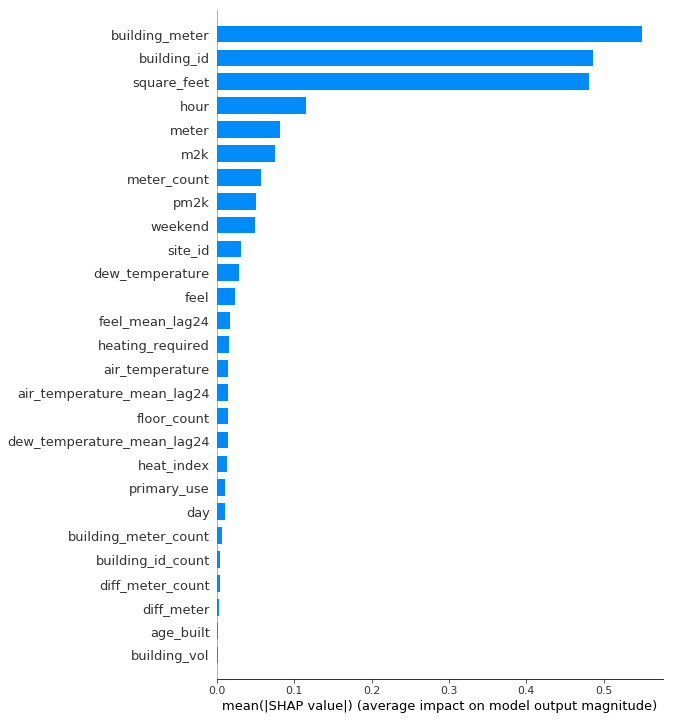

In [26]:
shap.summary_plot(shap_values, train.iloc[pos,:], plot_type="bar", max_display = train.shape[1])
